<a href="https://colab.research.google.com/github/ghhyc/Project-4/blob/main/Heart3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Heart Attack prediction using Machine Learning.**

##Features listed below.

  1. age - years
  2. sex (0-female, 1-male)
  3. chest_pain_typee -chest pain (0-asymptomatic, 1=typical angina, 2=atypical angina, 3=non-agina pain.
  4. trtbps- resting blood pressure upon arrival to hospital (Hg/mm)
  5. chol - cholestorol (mg/dl)
  6. fbs - fasting blood sugar > 120 mg/dL (0=false, 1=true)
  7. restecg - resting electro-cardiagram results (0=normal, 1=hyperthrophy, 2=having ST-T abnormal)
  8. thalach - max. heart rate 
  9. exng - excercise induced angina (0=no, 1=yes)
  10. oldpeak - ST depression induced by excercise relative to resting
  11. slp - slope of peak ST (0=down, 1=flat, 2=up)
  12. caa - vessel count (0-4) colored by flouroscopy
  13. thall - thallium stress test (1=fixed defect, 2=reversable defect, 3=normal
  14. **ouput** - 0=chance of heart attack is low, 1= chance of heart attack is high.
  

In [ ]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 76.1 MB 76 kB/s 
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from scipy.stats import loguniform
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from catboost import CatBoostClassifier

In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/heart_statlog_cleveland_hungary_final.csv'
heart = pd.read_csv(path)
heart

,age,sex,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,54,1,3,150,195.0,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264.0,0,0,132,0,1.2,2,1
1186,68,1,4,144,193.0,1,0,141,0,3.4,2,1
1187,57,1,4,130,131.0,0,0,115,1,1.2,2,1
1188,57,0,2,130,236.0,0,2,174,0,0.0,2,1


In [ ]:

heart.describe()

,age,sex,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1018.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,245.906680,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,57.244599,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,209.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,240.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# New Section

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bps          1190 non-null   int64  
 4   cholesterol          1018 non-null   float64
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 111.7 KB


In [ ]:
# Remove any rows with empty values
heart.replace(float('nan'), np.nan, inplace=True)
heart.dropna(inplace=True)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1018 non-null   int64  
 1   sex                  1018 non-null   int64  
 2   chest_pain_type      1018 non-null   int64  
 3   resting_bps          1018 non-null   int64  
 4   cholesterol          1018 non-null   float64
 5   fasting_blood_sugar  1018 non-null   int64  
 6   resting_ecg          1018 non-null   int64  
 7   max_heart_rate       1018 non-null   int64  
 8   exercise_angina      1018 non-null   int64  
 9   oldpeak              1018 non-null   float64
 10  ST_slope             1018 non-null   int64  
 11  target               1018 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 103.4 KB


In [ ]:
heart.head()

,age,sex,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from scipy.stats import loguniform
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from catboost import CatBoostClassifier

In [ ]:
heart.sex.value_counts().to_frame()

# majority of paitents are males (2x)

,sex
1,748
0,270


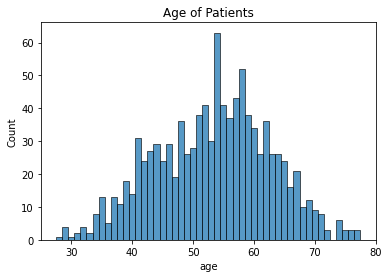

In [ ]:
sns.histplot(heart.age, discrete=True)
plt.title("Age of Patients")
plt.show()

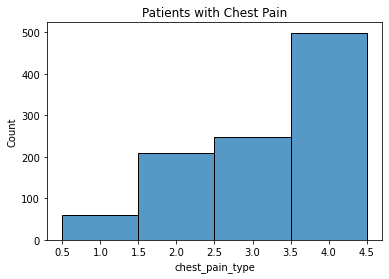

In [ ]:
#patients with chest pain (chest_pain_type)

sns.histplot(heart.chest_pain_type, discrete=True)
plt.title("Patients with Chest Pain")
plt.show()

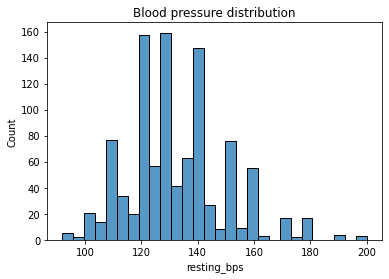

In [ ]:
sns.histplot(heart.resting_bps)
plt.title('Blood pressure distribution')
plt.show()

##**source** https://www.cdc.gov/bloodpressure/about.htm

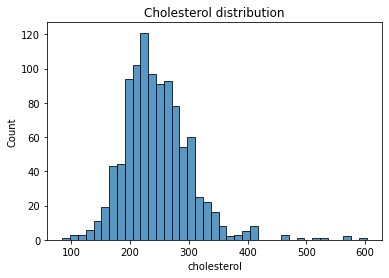

In [ ]:
sns.histplot(heart.cholesterol)
plt.title('Cholesterol distribution')
plt.show()

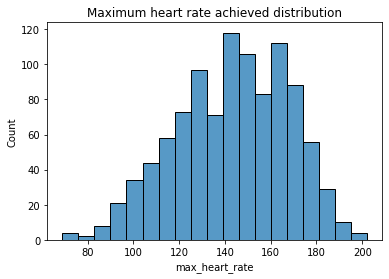

In [ ]:
sns.histplot(heart.max_heart_rate)
plt.title('Maximum heart rate achieved distribution')
plt.show()

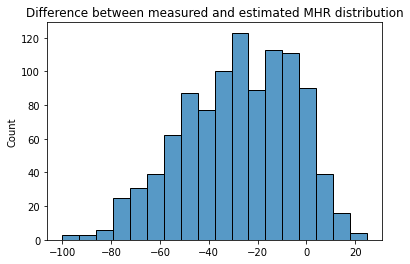

In [ ]:
sns.histplot(heart.max_heart_rate - (208 - (0.7 * heart.age)))
plt.title('Difference between measured and estimated MHR distribution')
plt.show()

In [ ]:
rf_classifier = RandomForestClassifier(max_depth=8,
                                       n_estimators=100,
                                       random_state=42)
rf_classifier.fit(heart.drop('target', axis=1), heart['target'])

RandomForestClassifier(max_depth=8, random_state=42)

**the target is is categorical value. we will check influence of other features by comparing dist. for high risk(1) and low risk(0)

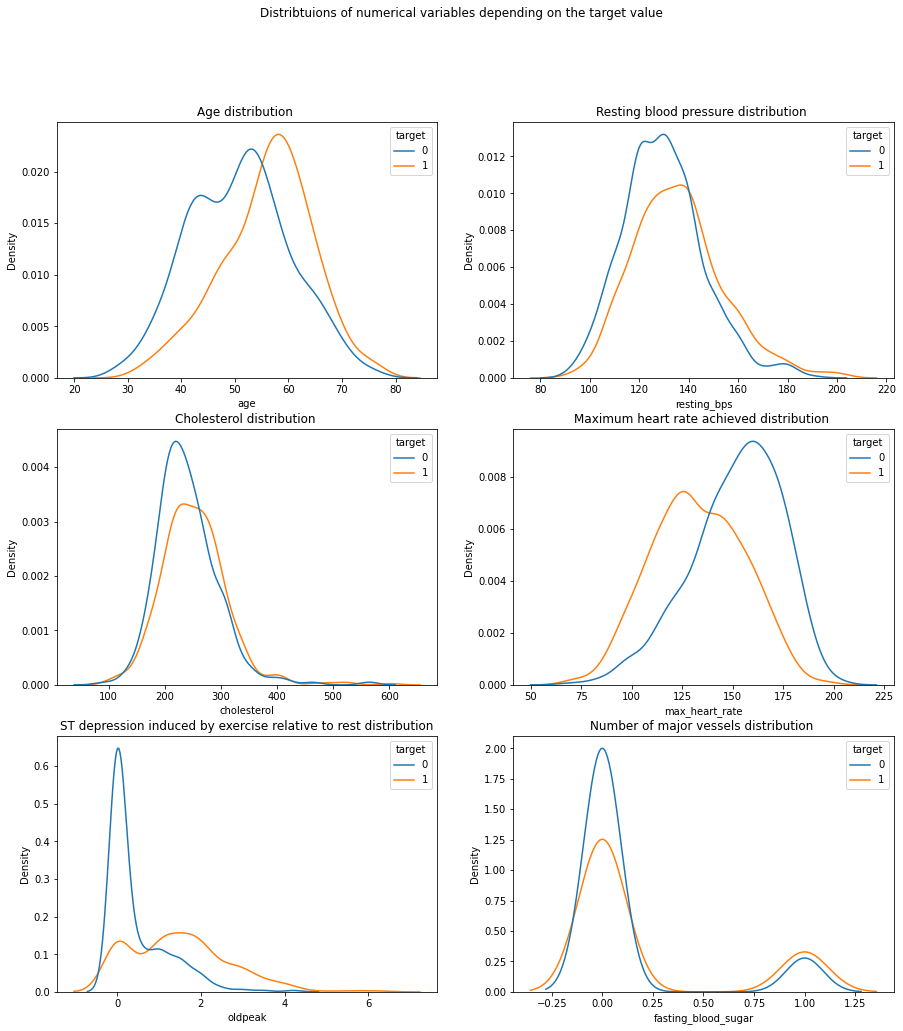

In [ ]:
_, axes = plt.subplots(3, 2, figsize=(15,16))
sns.kdeplot(data=heart, x='age', hue='target', ax=axes[0, 0])
axes[0, 0].set_title('Age distribution ')
sns.kdeplot(data=heart, x='resting_bps', hue='target', ax=axes[0, 1])
axes[0, 1].set_title('Resting blood pressure distribution ')
sns.kdeplot(data=heart, x='cholesterol', hue='target', ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol distribution ')
sns.kdeplot(data=heart, x='max_heart_rate', hue='target', ax=axes[1, 1])
axes[1, 1].set_title('Maximum heart rate achieved distribution ')  
sns.kdeplot(data=heart, x='oldpeak', hue='target', ax=axes[2, 0])
axes[2, 0].set_title('ST depression induced by exercise relative to rest distribution')
sns.kdeplot(data=heart, x='fasting_blood_sugar', hue='target', ax=axes[2, 1])
axes[2, 1].set_title('Number of major vessels distribution ')
plt.suptitle('Distribtuions of numerical variables depending on the target value')
plt.show()

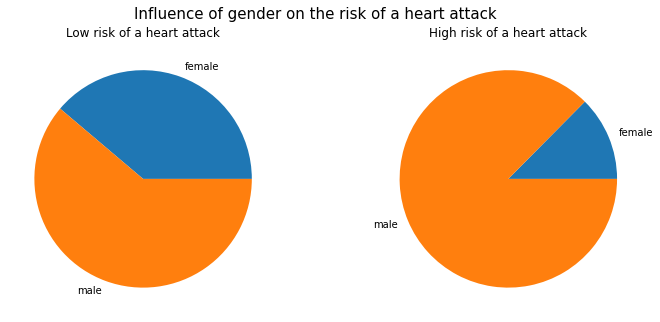

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].pie(heart.query('target == 0').groupby('sex')['sex'].count(), labels=['female', 'male'])
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(heart.query('target == 1').groupby('sex')['sex'].count(), labels=['female', 'male'])
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of gender on the risk of a heart attack', fontsize=15)
plt.show()

In [ ]:
heart.groupby('target', as_index=False)['sex'].mean() # this means that men are 87% likely to have heart disease while women are 61.1% prone to it.

,target,sex
0,0,0.611830
1,1,0.874214


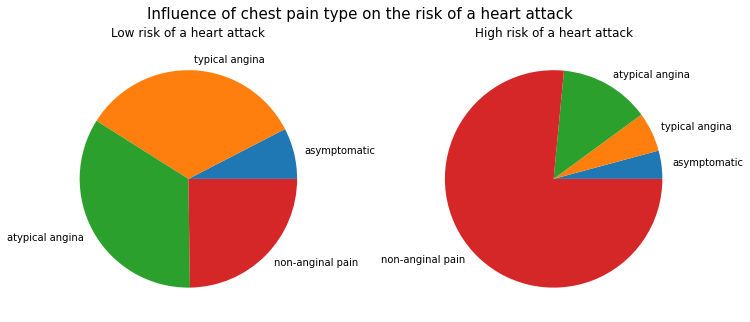

In [ ]:
#Let's consider chest pain


_, axes = plt.subplots(1, 2, figsize=(12,5)) 

labels = ['asymptomatic', 'typical angina', 'atypical angina', 'non-anginal pain']

axes[0].pie(heart.query('target == 0').groupby('chest_pain_type')['chest_pain_type'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(heart.query('target == 1').groupby('chest_pain_type')['chest_pain_type'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of chest pain type on the risk of a heart attack', fontsize=15)
plt.show()

# from the chart above, it seems that any type of chest pain are considered at risk.

In [ ]:
#feature engineering

rf_classifier = RandomForestClassifier(max_depth=8,
                                       n_estimators=100,
                                       random_state=42)
rf_classifier.fit(heart.drop('target', axis=1), heart['target'])

RandomForestClassifier(max_depth=8, random_state=42)

In [ ]:
# determine the hierchy of importance
importance = pd.concat([pd.Series(heart.columns[:-1]), 
                        pd.Series(rf_classifier.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance = importance.sort_values(by='importance', ascending=False)
importance

,feature,importance
10,ST_slope,0.211326
2,chest_pain_type,0.134385
9,oldpeak,0.132743
8,exercise_angina,0.113177
7,max_heart_rate,0.103351
0,age,0.078141
4,cholesterol,0.075740
3,resting_bps,0.072095
1,sex,0.044626
6,resting_ecg,0.026731


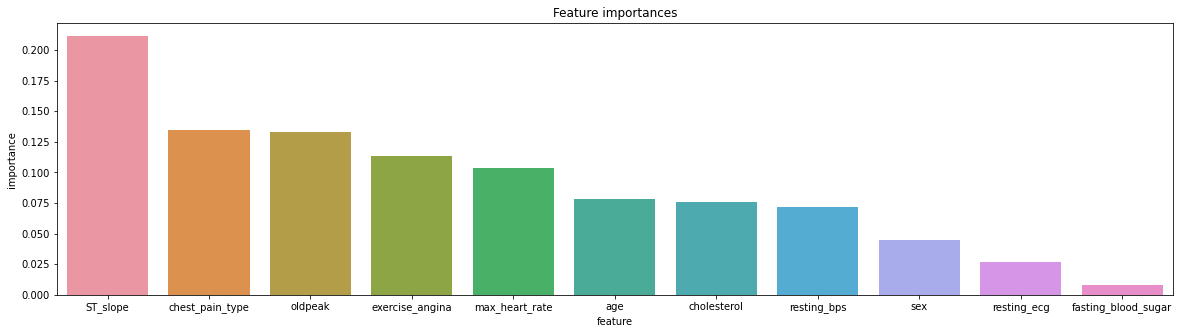

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(data=importance, x='feature', y='importance')
plt.title('Feature importances')
plt.show()

In [ ]:
heart2 = heart.drop('fasting_blood_sugar', axis=1)

#adding new features such as Medical Heart Rate achieved. In common medical practice, it is calculated by MHR=208-(0.7*age)

In [ ]:
heart2['mhr_estimate'] = 208 - (0.7 * heart2['age'])

As it was discussed before, we can make a new categorical feature from blood pressure using the following label system:

pressure < 120 = 0 (normal)
120 <= pressure < 140 = 1 (elevated)
140 <= pressure = 2 (high)

In [ ]:
heart2['blood_pressure'] = heart2['resting_bps'].apply(lambda x: 0 if x < 120 else (1 if x < 140 else 2))

In [ ]:
heart2['blood_pressure'].value_counts().to_frame()

,blood_pressure
1,482
2,363
0,173


##The same idea can be applied to cholesterol levels
https://www.pennmedicine.org/updates/blogs/heart-and-vascular-blog/2015/february/protecting-your-heart-what-is-a-healthy-cholesterol-level-for-you

* cholesterol < 200 = 0 (desirable)
* 200 <= cholesterol < 240 = 1 (borderline)
* 240 <= cholesterol = 2 (high)

In [ ]:
heart2['cholesterol_level'] = heart2['cholesterol'].apply(lambda x: 0 if x < 200 else (1 if x < 240 else 2))

In [ ]:
heart2['cholesterol_level'].value_counts().to_frame()

,cholesterol_level
2,510
1,323
0,185


Also, we can make a feature that will characterize both of the last considered features. Let's simply summarize two categories. If a person has 0, it means that he has normal blood pressure and normal cholesterol. But if the value is 4, it means that he has high blood pressure and high cholesterol.

In [ ]:
heart2['pres_chol_summary'] = heart2['blood_pressure'] + heart2['cholesterol_level']

In [ ]:
heart2['pres_chol_summary'].value_counts().to_frame()

,pres_chol_summary
3,347
2,293
4,195
1,144
0,39


##In the previous section we summed other categorical features and were able to observe the difference in the target. Let's do the same here. The interpretation of the feature is simple - the lower value the better person's health according to these tests.


In [ ]:
heart2['summary'] = heart2['chest_pain_type'] + heart2['resting_ecg'] + heart2['exercise_angina'] + heart2['max_heart_rate']

In [ ]:
heart2.head()

,age,sex,chest_pain_type,resting_bps,cholesterol,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target,mhr_estimate,blood_pres_cat,blood_pressure,cholesterol_level,pres_chol_summary,summary
0,40,1,2,140,289.0,0,172,0,0.0,1,0,180.0,2,2,2,4,174
1,49,0,3,160,180.0,0,156,0,1.0,2,1,173.7,2,2,0,2,159
2,37,1,2,130,283.0,1,98,0,0.0,1,0,182.1,1,1,2,3,101
3,48,0,4,138,214.0,0,108,1,1.5,2,1,174.4,1,1,1,2,113
4,54,1,3,150,195.0,0,122,0,0.0,1,0,170.2,2,2,0,2,125


In [ ]:
heart2['summary'].value_counts().to_frame()

,summary
165,25
164,25
157,23
152,22
144,22
...,...
73,1
89,1
111,1
92,1


In [ ]:
len(heart2.columns) - len(heart.columns)

5

In [ ]:
heart2.head()

,age,sex,chest_pain_type,resting_bps,cholesterol,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target,mhr_estimate,blood_pres_cat,blood_pressure,cholesterol_level,pres_chol_summary,summary
0,40,1,2,140,289.0,0,172,0,0.0,1,0,180.0,2,2,2,4,174
1,49,0,3,160,180.0,0,156,0,1.0,2,1,173.7,2,2,0,2,159
2,37,1,2,130,283.0,1,98,0,0.0,1,0,182.1,1,1,2,3,101
3,48,0,4,138,214.0,0,108,1,1.5,2,1,174.4,1,1,1,2,113
4,54,1,3,150,195.0,0,122,0,0.0,1,0,170.2,2,2,0,2,125


##asses the new changes with cross validation and compare the old heart data set and new heart data set.

In [ ]:
# assess the changes using cross validation

cross_val_score(
    estimator=RandomForestClassifier(max_depth=8,
                                     n_estimators=100,
                                     random_state=42),
    X=heart.drop('target', axis=1),
    y=heart['target'],
    scoring='f1',
    cv=5
).mean()

0.8941401712115798

In [ ]:
cross_val_score(
    estimator=RandomForestClassifier(max_depth=8,
                                     n_estimators=100,
                                     random_state=42),
    X=heart2.drop('target', axis=1),
    y=heart2['target'],
    scoring='f1',
    cv=5
).mean()

0.8929807992902179

##Data Prep for Machine Learning


In [ ]:
num_features = ['age', 'resting_bps', 'cholesterol', 'max_heart_rate', 'oldpeak', 'mhr_estimate']
cat_features = ['sex', 'chest_pain_type', 'resting_ecg', 'exercise_angina', 'ST_slope', 'blood_pres_cat', 'cholesterol_level', 'pres_chol_summary', 'summary']

In [ ]:
#Now we can create the matrix of features and the dependent variable vector.

features = heart2.drop('target', axis=1)
target = heart2['target'].astype('int')

In [ ]:
print(features.shape)
print(target.shape)

(1018, 16)
(1018,)


Preparation for CatBoost
CatBoost is one of the most efficient gradient boosting libraries. According to the library documentation, it's not recommended to do data preparation beforehand (especially for categorical features, because CatBoost has its own built-in mechanisms to handle categorical features). Feature scaling also will be omitted. One thing we have to do is splitting the dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) 

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(814, 16)
(204, 16)
(814,)
(204,)


In [ ]:
#To avoid any conflicts in the fiture we have to transform our categorical features to string type.

X_train[cat_features] = X_train[cat_features].astype('str')
X_test[cat_features] = X_test[cat_features].astype('str')


In [ ]:
X_train.head()

,age,sex,chest_pain_type,resting_bps,cholesterol,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,mhr_estimate,blood_pres_cat,blood_pressure,cholesterol_level,pres_chol_summary,summary
137,39,1,2,120,241.0,1,146,0,2.0,1,180.7,1,1,2,3,149
952,60,1,4,145,282.0,2,142,1,2.8,2,166.0,2,2,2,4,149
926,61,1,3,150,243.0,0,137,1,1.0,2,165.3,2,2,2,4,141
289,48,0,2,133,308.0,1,156,0,2.0,1,174.4,1,1,2,3,159
1071,60,0,4,158,305.0,2,161,0,0.0,1,166.0,2,2,2,4,167


In [ ]:
X_test.head()

,age,sex,chest_pain_type,resting_bps,cholesterol,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,mhr_estimate,blood_pres_cat,blood_pressure,cholesterol_level,pres_chol_summary,summary
700,41,1,3,130,214.0,2,168,0,2.0,2,179.3,1,1,1,2,173
1086,59,1,1,160,273.0,2,125,0,0.0,1,166.7,2,2,2,4,128
759,50,1,3,140,233.0,0,163,0,0.6,2,173.0,2,2,1,3,166
31,56,1,3,130,167.0,0,114,0,0.0,1,168.8,1,1,0,1,117
136,43,0,2,120,215.0,1,175,0,0.0,1,177.9,1,1,1,2,178


#Encoding categorical data
In the dataset, all categorical variables have been already encoded by label encoding. I don't find this a good idea. Let's use Ohe Hot Encoding.

In [ ]:
features_encoding = pd.get_dummies(features, drop_first=True, columns=cat_features)

In [ ]:
features_encoding.head()

,age,resting_bps,cholesterol,max_heart_rate,oldpeak,mhr_estimate,blood_pressure,sex_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ecg_1,resting_ecg_2,exercise_angina_1,ST_slope_1,ST_slope_2,ST_slope_3,blood_pres_cat_1,blood_pres_cat_2,cholesterol_level_1,cholesterol_level_2,pres_chol_summary_1,pres_chol_summary_2,pres_chol_summary_3,pres_chol_summary_4,summary_75,summary_77,summary_84,summary_88,summary_89,summary_91,summary_92,summary_93,summary_94,summary_96,summary_97,summary_98,summary_99,summary_100,summary_101,...,summary_158,summary_159,summary_160,summary_161,summary_162,summary_163,summary_164,summary_165,summary_166,summary_167,summary_168,summary_169,summary_170,summary_171,summary_172,summary_173,summary_174,summary_175,summary_176,summary_177,summary_178,summary_179,summary_180,summary_181,summary_182,summary_183,summary_184,summary_185,summary_186,summary_187,summary_188,summary_189,summary_190,summary_191,summary_192,summary_193,summary_194,summary_197,summary_199,summary_206
0,40,140,289.0,172,0.0,180.0,2,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,49,160,180.0,156,1.0,173.7,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,37,130,283.0,98,0.0,182.1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,48,138,214.0,108,1.5,174.4,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,54,150,195.0,122,0.0,170.2,2,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Train-test split
Let's split the data into the training and test sets in the ratio 80/20.

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features_encoding, target, test_size=0.2, random_state=42)

In [ ]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(814, 136)
(204, 136)
(814,)
(204,)


In [ ]:
# Standardized
scaler = StandardScaler()
features_train[num_features] = scaler.fit_transform(features_train[num_features])
features_test[num_features] = scaler.transform(features_test[num_features])

In [ ]:
features_train.head()

,age,resting_bps,cholesterol,max_heart_rate,oldpeak,mhr_estimate,blood_pressure,sex_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ecg_1,resting_ecg_2,exercise_angina_1,ST_slope_1,ST_slope_2,ST_slope_3,blood_pres_cat_1,blood_pres_cat_2,cholesterol_level_1,cholesterol_level_2,pres_chol_summary_1,pres_chol_summary_2,pres_chol_summary_3,pres_chol_summary_4,summary_75,summary_77,summary_84,summary_88,summary_89,summary_91,summary_92,summary_93,summary_94,summary_96,summary_97,summary_98,summary_99,summary_100,summary_101,...,summary_158,summary_159,summary_160,summary_161,summary_162,summary_163,summary_164,summary_165,summary_166,summary_167,summary_168,summary_169,summary_170,summary_171,summary_172,summary_173,summary_174,summary_175,summary_176,summary_177,summary_178,summary_179,summary_180,summary_181,summary_182,summary_183,summary_184,summary_185,summary_186,summary_187,summary_188,summary_189,summary_190,summary_191,summary_192,summary_193,summary_194,summary_197,summary_199,summary_206
137,-1.523198,-0.699811,-0.076074,0.125185,0.969539,1.523198,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
952,0.695029,0.735356,0.638105,-0.038117,1.694744,-0.695029,2,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
926,0.800659,1.022389,-0.041236,-0.242244,0.063032,-0.800659,2,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
289,-0.572529,0.046475,1.090999,0.533438,0.969539,0.572529,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1071,0.695029,1.481642,1.038742,0.737565,-0.843474,-0.695029,2,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
features_test.head()

,age,resting_bps,cholesterol,max_heart_rate,oldpeak,mhr_estimate,blood_pressure,sex_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,resting_ecg_1,resting_ecg_2,exercise_angina_1,ST_slope_1,ST_slope_2,ST_slope_3,blood_pres_cat_1,blood_pres_cat_2,cholesterol_level_1,cholesterol_level_2,pres_chol_summary_1,pres_chol_summary_2,pres_chol_summary_3,pres_chol_summary_4,summary_75,summary_77,summary_84,summary_88,summary_89,summary_91,summary_92,summary_93,summary_94,summary_96,summary_97,summary_98,summary_99,summary_100,summary_101,...,summary_158,summary_159,summary_160,summary_161,summary_162,summary_163,summary_164,summary_165,summary_166,summary_167,summary_168,summary_169,summary_170,summary_171,summary_172,summary_173,summary_174,summary_175,summary_176,summary_177,summary_178,summary_179,summary_180,summary_181,summary_182,summary_183,summary_184,summary_185,summary_186,summary_187,summary_188,summary_189,summary_190,summary_191,summary_192,summary_193,summary_194,summary_197,summary_199,summary_206
700,-1.311939,-0.125745,-0.546388,1.023343,0.969539,1.311939,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1086,0.589399,1.596456,0.481334,-0.732149,-0.843474,-0.589399,2,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
759,-0.361270,0.448322,-0.215427,0.819216,-0.299570,0.361270,2,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,0.272509,-0.125745,-1.365081,-1.181228,-0.843474,-0.272509,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
136,-1.100679,-0.699811,-0.528969,1.309121,-0.843474,1.100679,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Modeling
In this section, we will learn several models and compare their performance using cross-validation. For hyperparameters tuning RandomizedSearchCV will be used. As a target, metric we will use f1-score.

In [ ]:
#Support Vector Machine

parameters_svc = dict(
    C=loguniform(0.0001, 20),
    kernel=['rbf', 'poly'],
    gamma=loguniform(0.0001, 20)

)

In [ ]:
%%time
random_search_svc = RandomizedSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_distributions=parameters_svc,
    n_iter=75,
    scoring='f1',
    cv=5,
    random_state=42
)
random_search_svc.fit(features_train, target_train)

CPU times: user 1min 35s, sys: 0 ns, total: 1min 35s
Wall time: 1min 37s


In [ ]:
svc_cv_f1 = random_search_svc.best_score_
svc_cv_f1

0.8828806665395236

In [ ]:
random_search_svc.best_params_

{'C': 0.005294275586206971, 'gamma': 0.7373339589269352, 'kernel': 'poly'}

In [ ]:
best_svc = random_search_svc.best_estimator_

#Random forest
5 parameters will be tuned for the Random Forest.

In [ ]:
parameters_rf = dict(
    n_estimators=range(5, 1000),
    max_depth=range(4, 30),
    min_samples_split=range(2, 10),
    min_samples_leaf=range(1, 10),
    max_features=range(2, features_train.shape[1])
)

In [ ]:
%%time
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=parameters_rf,
    n_iter=75,
    scoring='f1',
    cv=5,
    random_state=42,
    verbose=1
)
random_search_rf.fit(features_train, target_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
CPU times: user 8min 8s, sys: 2.64 s, total: 8min 11s
Wall time: 8min 10s


In [ ]:
rf_cv_f1 = random_search_rf.best_score_
rf_cv_f1

0.907248683552781

In [ ]:
random_search_rf.best_params_

{'max_depth': 21,
 'max_features': 39,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 631}

In [ ]:
best_rf = random_search_rf.best_estimator_

#CatBoost
As we discussed before, CatBoost will be trained on the unprepared data. 5 parameters will be tuned: learning rate (the higher - the bigger the step of the gradient descent), iterations, depth, l2_leaf_reg (regularization parameter), random_strength (a parameter that adds random to the model).

In [ ]:
parameters_boost=dict(
    learning_rate=loguniform(0.0001, 0.5),
    iterations=range(10, 500),
    depth=range(3, 12),
    l2_leaf_reg=uniform(1, 20),
    random_strength=loguniform(0.001, 1000)
)

In [ ]:
%%time
random_search_boost = RandomizedSearchCV(
    estimator=CatBoostClassifier(verbose=False, cat_features=cat_features, eval_metric='F1'),
    param_distributions=parameters_boost,
    n_iter=25,
    scoring='f1',
    cv=5,
    random_state=42,
    verbose=1
)
random_search_boost.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
125 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 4770, in fit
    silent, early_stopping_rounds, save_snapshot, snapshot_file, snapshot_interval, init_model, callbacks, log_cout, log_cerr)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 2081, in _fit
    callbacks=callb

CatBoostError: ignored

#model comparision


In [ ]:
results_cv = pd.DataFrame([
    ['svm', svc_cv_f1],
    ['random forest', rf_cv_f1],
    ],
    columns=['model', 'f1-score on cross-validation']
)

In [ ]:
results_cv

,model,f1-score on cross-validation
0,svm,0.882881
1,random forest,0.907249


#evaluation of SVM and Random Forest



In [ ]:
# need to make predictions.

svc_pred = best_svc.predict(features_test)
rf_pred = best_rf.predict(features_test)

In [ ]:
svc_pred_prob = best_svc.predict_proba(features_test)[:, 1]
rf_pred_prob = best_rf.predict_proba(features_test)[:, 1]

# Verify through F1-scores

In [ ]:
f1_svc_test = f1_score(target_test, svc_pred)
f1_svc_test

0.883495145631068

In [ ]:
f1_rf_test = f1_score(target_test, rf_pred)
f1_rf_test

0.9099526066350712

In [ ]:
results_cv['f1-score on the test set'] = pd.Series([f1_svc_test, f1_rf_test])

In [ ]:
results_cv

,model,f1-score on cross-validation,f1-score on the test set
0,svm,0.882881,0.883495
1,random forest,0.907249,0.909953


ROC-curve
ROC-curve is another important metric to evaluate the performance of a classification model. The main advantage is that it's independent of the classification thresholds.

In [ ]:
fpr_svc, tpr_svc, thresh_svc = roc_curve(target_test, svc_pred_prob)
fpr_rf, tpr_rf, thresh_rf = roc_curve(target_test, rf_pred_prob)

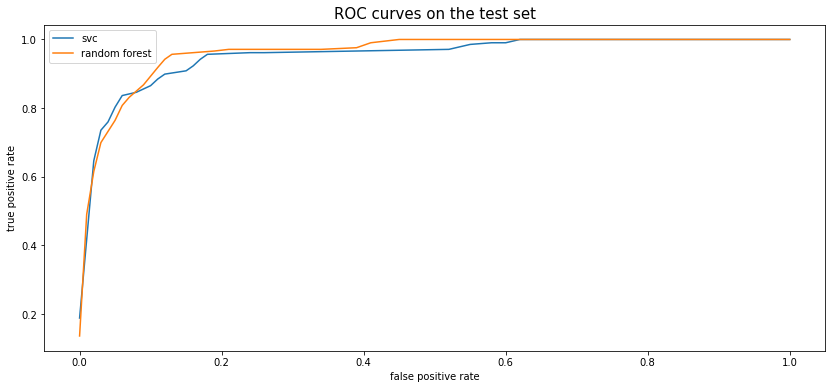

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(x=fpr_svc, y=tpr_svc, ci=None, label='svc')
sns.lineplot(x=fpr_rf, y=tpr_rf, ci=None, label='random forest')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curves on the test set', fontsize=15)
plt.legend()
plt.show()

In [ ]:
#areas under the curve
roc_auc_svc_test = roc_auc_score(target_test, svc_pred_prob)
roc_auc_svc_test

0.9543269230769231

In [ ]:
roc_auc_rf_test = roc_auc_score(target_test, rf_pred_prob)
roc_auc_rf_test

0.9624999999999999

In [ ]:
results_cv['roc_auc on the test set'] = pd.Series([roc_auc_svc_test, roc_auc_rf_test])

In [ ]:
results_cv

,model,f1-score on cross-validation,f1-score on the test set,roc_auc on the test set
0,svm,0.882881,0.883495,0.954327
1,random forest,0.907249,0.909953,0.962500


#Features of Importance

In [ ]:
final_importance = pd.concat([pd.Series(features_train.columns)], axis=1)
final_importance.columns = ['feature', 'importance']
final_importance = final_importance.sort_values(by='importance', ascending=False)
final_importance

ValueError: ignored

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(data=final_importance, x='features', y='importance')
plt.xticks(rotation=45)
plt.title('Feature importances by catboost', fontsize=14)
plt.show()

ValueError: ignored

<Figure size 1008x432 with 0 Axes>